In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
df = pd.read_csv('/content/drive/MyDrive/MSC DSAI/Maths/risk_analytics_train - risk_analytics_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.shape

(614, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [11]:
df.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [18]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Encoded data

In [17]:
encoded_data = pd.get_dummies(df, columns = ['Gender', 'Education', 'Self_Employed'], dtype = int)
encoded_data

,Loan_ID,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,LP001002,No,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,1,0,1,0
1,LP001003,Yes,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,1,0,1,0
2,LP001005,Yes,0.0,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,1,0,0,1
3,LP001006,Yes,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,1,0
4,LP001008,No,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y,1,0,1,0,1,0
610,LP002979,Yes,3.0,4106,0.0,40.0,180.0,1.0,Rural,Y,0,1,1,0,1,0
611,LP002983,Yes,1.0,8072,240.0,253.0,360.0,1.0,Urban,Y,0,1,1,0,1,0
612,LP002984,Yes,2.0,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1,1,0,1,0


# Bar plot

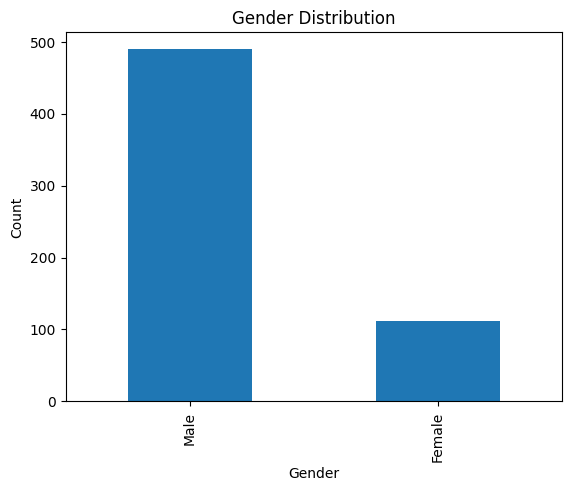

In [24]:
bar_plot = df['Gender'].value_counts().plot(kind='bar')
bar_plot.set_xlabel('Gender')
bar_plot.set_ylabel('Count')
bar_plot.set_title('Gender Distribution')
plt.show()

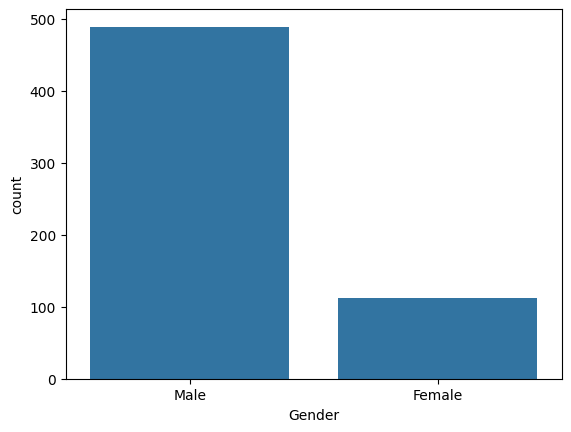

In [25]:
sb.countplot(x='Gender', data=df)
plt.show()